In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [90]:
df = pd.read_csv('googleplaystore.csv')

In [64]:
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [91]:

df['Installs'].unique()
df['Installs'] = df['Installs'].replace(to_replace ='[+,]', value = '', regex = True)
df['Installs'] = df['Installs'].replace(to_replace ='Free', value = np.NaN , regex = True)
df['Installs'] = df['Installs'].astype('Int64')

In [92]:
df['Size'] = df['Size'].replace(to_replace ='k', value = '' , regex = True)
df['Size'] = df['Size'].replace(to_replace ='M', value = '000' , regex = True)
df['Size'] = df['Size'].replace(to_replace ='[.+,]', value = "" , regex = True)
df['Size'] = df['Size'].replace(to_replace ='Varies with device', value = np.NaN , regex = True)
df['Size'] = df['Size'].astype('Int64')

In [67]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [93]:
df['Price'] = df['Price'].replace(to_replace =['veryone','0'], value = np.NaN , regex = True)

In [94]:
df['Price'] = df['Price'].str.slice(start=1) # Удаляем первый символ с столбце Price

In [96]:
df['Price'] = df['Price'].astype('float64') # Приобразуем в вещественный тип данных

In [71]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,NaN,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,NaN,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,NaN,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,NaN,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,NaN,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [97]:
df['Category'] = df['Category'].replace(to_replace='1.9', value=np.NaN)
df['Category'] = df['Category'].astype('string')
df['Category'] = df['Category'].dropna()


In [98]:
df.describe()

,Rating,Size,Installs,Price
count,9367.000000,9146.000000,1.084000e+04,617.000000
mean,4.193338,38963.824513,1.546434e+07,16.327893
std,0.537431,25050.399132,8.502936e+07,62.279233
min,1.000000,11.000000,0.000000e+00,1.260000
25%,4.000000,19000.000000,1.000000e+03,2.590000
50%,4.300000,33000.000000,1.000000e+05,3.990000
75%,4.500000,55000.000000,5.000000e+06,5.990000
max,19.000000,100000.000000,1.000000e+09,399.990000


In [99]:
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,<NA>,19.0,3.0M,1000,<NA>,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [100]:
df = df.drop(index=[10472]) # Удаляем строку, т.к. много данных в ней не заполнено и не на что это не повлияет

In [101]:
df.describe()

,Rating,Size,Installs,Price
count,9366.000000,9145.000000,1.084000e+04,617.000000
mean,4.191757,38967.975834,1.546434e+07,16.327893
std,0.515219,25048.622495,8.502936e+07,62.279233
min,1.000000,11.000000,0.000000e+00,1.260000
25%,4.000000,19000.000000,1.000000e+03,2.590000
50%,4.300000,33000.000000,1.000000e+05,3.990000
75%,4.500000,55000.000000,5.000000e+06,5.990000
max,5.000000,100000.000000,1.000000e+09,399.990000


In [102]:
df['sum'] = df['Installs'] * df['Price'] # Формируем новый столбец со значениями Заработанных на каждом приложении

In [103]:
free_prog = df[df['Type'] != 'Paid']
paid_prog = df[df['sum'] > 1]

In [104]:
catagory = paid_prog[['sum', 'Category']].groupby(['Category']).sum().sort_values(by='sum', ascending=False)[:10]
catagory

,sum
Category,
FAMILY,183139378.37
LIFESTYLE,53578860.0
GAME,25967031.99
FINANCE,25726678.98
PHOTOGRAPHY,20922747.7
MEDICAL,11533870.28
PERSONALIZATION,8063395.23
TOOLS,5371412.14
SPORTS,4693931.95


<AxesSubplot: title={'center': 'Сумма продаж по категориям'}, xlabel='Category'>

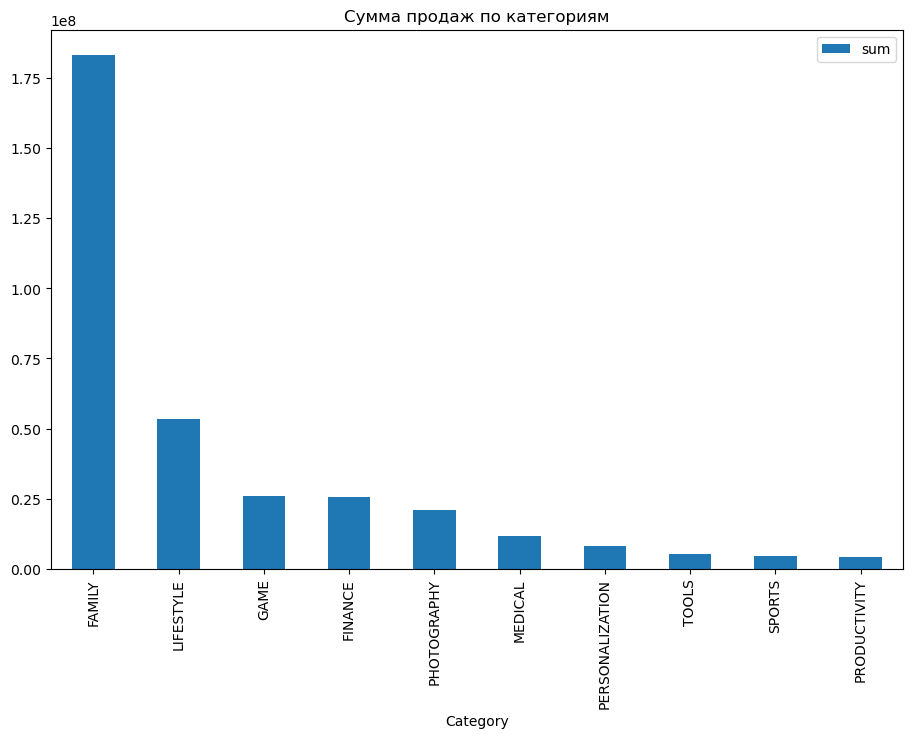

In [105]:
catagory.plot(kind='bar', title='Сумма продаж по категориям')


На данной столбчетой диограмме мы можем видеть топ-10 самых прибыльных категорий программ.

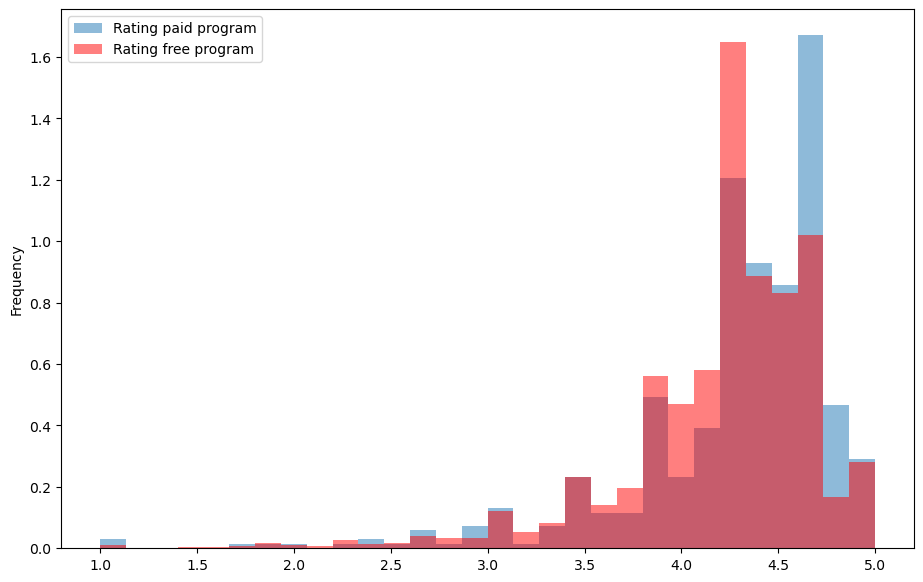

In [106]:
paid_prog['Rating'].plot(kind='hist', alpha = 0.5, bins = 30, density = True, label = 'Rating paid program')
free_prog['Rating'].plot(kind='hist', alpha = 0.5, bins = 30, density = True, color = 'red', label = 'Rating free program')

plt.legend(loc='upper left', fontsize=10)


#plt.title ('Гистограмма распределения оценок пользователей')


Из данной визуализации можно сделать вывод, оченки за плптные и бесплатные приложения оцениваются практически одинаково.

<AxesSubplot: title={'center': 'Распределение оценок'}>

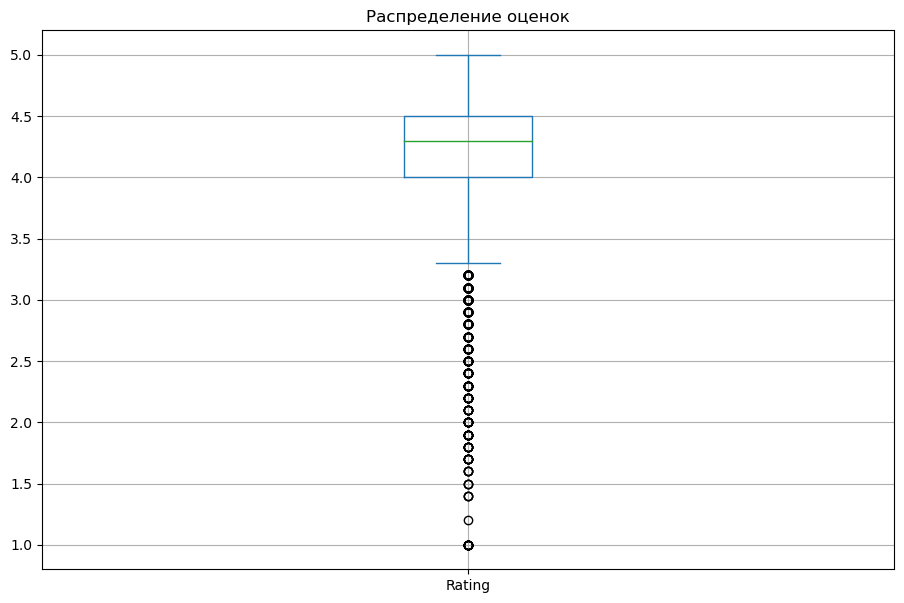

In [107]:
df[['Rating']].plot(kind='box', title='Распределение оценок', grid=True)

Из данной визуализации можно сделать вывод, что низких оценок достаточно мало, но их нельзя считать выбросами.

In [129]:

 
fig = px.box(df, x = "Rating", y='Size', points="all")
fig.update_traces(quartilemethod="inclusive")
 
fig.show()

Вывод - Рейтинг не зависит от размера приложений